In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
common_words = set([
    "a", "able", "about", "above", "accept", "according", "account", "across", 
    "act", "addition", "additional", "admit", "after", "again", "against",
    # ... (more common words)
    "you", "young", "your", "yours", "yourself", "yourselves"
])


In [3]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return len([s for s in sentences if s.strip()])

def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def count_difficult_words(text, common_words):
    words = re.findall(r'\b\w+\b', text)
    difficult_words = [word for word in words if word.lower() not in common_words]
    return len(difficult_words)


In [4]:
def dale_chall_readability(text, common_words):
    total_words = count_words(text)
    total_sentences = count_sentences(text)
    difficult_words = count_difficult_words(text, common_words)

    if total_words == 0 or total_sentences == 0:
        return None  # Avoid division by zero

    percent_difficult_words = (difficult_words / total_words) * 100
    average_sentence_length = total_words / total_sentences

    raw_score = 0.1579 * percent_difficult_words + 0.0496 * average_sentence_length

    if percent_difficult_words > 5:
        raw_score += 3.636

    return raw_score

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

# Calculate readability score
score = dale_chall_readability(financial_summary, common_words)
print(f"Dale–Chall Readability Score: {score}")


Dale–Chall Readability Score: 19.141061788617886


In [5]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return len([s for s in sentences if s.strip()])

def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def count_complex_words(text):
    words = re.findall(r'\b\w+\b', text)
    complex_words = [word for word in words if syllable_count(word) >= 3]
    return len(complex_words)

def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count


In [6]:
def gunning_fog_index(text):
    total_words = count_words(text)
    total_sentences = count_sentences(text)
    complex_words = count_complex_words(text)

    if total_words == 0 or total_sentences == 0:
        return None  # Avoid division by zero

    average_sentence_length = total_words / total_sentences
    percent_complex_words = (complex_words / total_words) * 100

    fog_index = 0.4 * (average_sentence_length + percent_complex_words)
    return fog_index

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

# Calculate Gunning Fog Index
fog_index = gunning_fog_index(financial_summary)
print(f"Gunning Fog Index: {fog_index}")


Gunning Fog Index: 12.295934959349594


Fry Readability Index: -3.3826473779385164


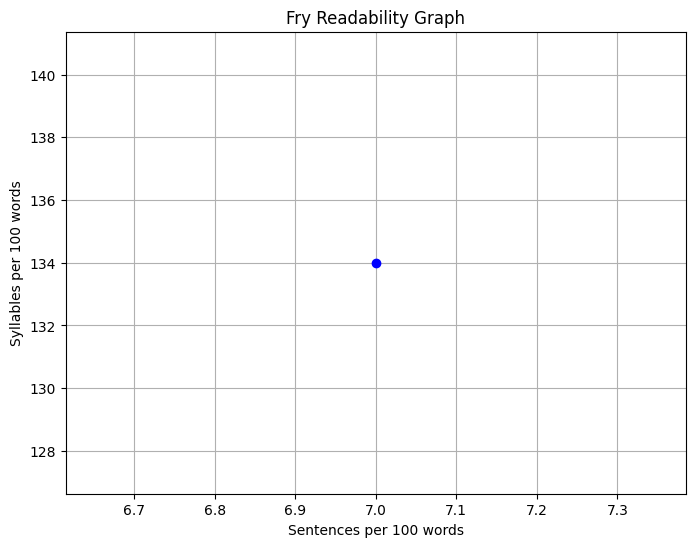

In [7]:
import matplotlib.pyplot as plt

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

def count_sentences(text):
    sentences = text.split('.')
    return len(sentences)

def count_syllables(word):
    vowels = 'aeiouy'
    count = 0
    prev_char_was_vowel = False
    for char in word:
        if char.lower() in vowels:
            if not prev_char_was_vowel:
                count += 1
                prev_char_was_vowel = True
        else:
            prev_char_was_vowel = False
    return count

def analyze_text(text):
    words = text.split()
    total_words = len(words)
    total_sentences = count_sentences(text)
    total_syllables = sum(count_syllables(word) for word in words)
    return total_words, total_sentences, total_syllables

def fry_readability_index(total_words, total_sentences, total_syllables):
    words_per_sentence = total_words / total_sentences
    syllables_per_word = total_syllables / total_words
    fry_index = 0.39 * (words_per_sentence + 11.8 * syllables_per_word) - 15.59
    return fry_index

# Analyze the financial summary
total_words, total_sentences, total_syllables = analyze_text(financial_summary)
fry_index = fry_readability_index(total_words, total_sentences, total_syllables)
print(f"Fry Readability Index: {fry_index}")

# Plot the Fry Readability Graph
plt.figure(figsize=(8, 6))
plt.plot(total_sentences, total_syllables, 'bo')
plt.xlabel('Sentences per 100 words')
plt.ylabel('Syllables per 100 words')
plt.title('Fry Readability Graph')
plt.grid(True)
plt.show()


In [8]:
import re
import math

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

def count_polysyllabic_words(text):
    words = re.findall(r'\b\w+\b', text)
    polysyllabic_words = [word for word in words if syllable_count(word) >= 3]
    return len(polysyllabic_words)

def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def smog_readability_score(text):
    total_sentences = len(re.findall(r'\.', text))
    polysyllabic_words = count_polysyllabic_words(text)
    
    if total_sentences == 0:
        return None  # Avoid division by zero
    
    smog_score = 1.0430 * math.sqrt(polysyllabic_words * (30 / total_sentences)) + 3.1291
    return smog_score

# Calculate McLaughlin’s SMOG Formula for the financial summary
smog_score = smog_readability_score(financial_summary)
print(f"McLaughlin’s SMOG Score: {smog_score}")

# Interpret the SMOG score
def interpret_smog_score(score):
    if score is None:
        return "Unable to calculate due to insufficient data."
    elif score <= 12:
        return "Understood by high school graduates."
    elif score <= 16:
        return "Understood by college graduates."
    else:
        return "May require some graduate-level education to understand."

print(interpret_smog_score(smog_score))


McLaughlin’s SMOG Score: 11.855464076750408
Understood by high school graduates.


In [9]:
import re

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

def count_single_syllable_words(text):
    words = re.findall(r'\b\w+\b', text)
    single_syllable_words = [word for word in words if syllable_count(word) == 1]
    return len(single_syllable_words)

def syllable_count(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def forecast_readability_score(text):
    single_syllable_words = count_single_syllable_words(text)
    forecast_score = 20 - (single_syllable_words / 15)
    return forecast_score

# Calculate FORECAST Formula for the financial summary
forecast_score = forecast_readability_score(financial_summary)
print(f"FORECAST Score: {forecast_score}")

# Interpret the FORECAST score
def interpret_forecast_score(score):
    if score <= 5:
        return "Easily understood by average 5th-grade students or lower."
    elif score <= 10:
        return "Easily understood by average 10th-grade students or lower."
    elif score <= 15:
        return "Easily understood by college students."
    else:
        return "May require graduate-level education to understand."

print(interpret_forecast_score(forecast_score))


FORECAST Score: 16.866666666666667
May require graduate-level education to understand.


In [10]:
import re

# Example financial summary
financial_summary = """
The company's revenue increased by 15% in the last quarter, reaching a total of $5 million.
This growth was driven by a 10% increase in sales and a 5% increase in service revenue.
Operating expenses remained stable at $3 million, leading to an operating profit of $2 million.
Net profit after tax amounted to $1.5 million, representing a 20% increase from the previous quarter.
The company's cash flow from operations was strong, allowing for significant reinvestment in growth initiatives.
"""

def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

def count_syllables(word):
    word = word.lower()
    vowels = "aeiouy"
    count = 0
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

def calculate_flesch_reading_ease(text):
    total_words = count_words(text)
    total_sentences = len(re.findall(r'[.!?]', text))
    total_syllables = sum(count_syllables(word) for word in re.findall(r'\b\w+\b', text))

    flesch_reading_ease = 206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (total_syllables / total_words)
    return flesch_reading_ease

def calculate_flesch_kincaid_grade_level(text):
    total_words = count_words(text)
    total_sentences = len(re.findall(r'[.!?]', text))
    total_syllables = sum(count_syllables(word) for word in re.findall(r'\b\w+\b', text))

    flesch_kincaid_grade_level = 0.39 * (total_words / total_sentences) + 11.8 * (total_syllables / total_words) - 15.59
    return flesch_kincaid_grade_level

# Calculate Flesch Reading Ease and Flesch-Kincaid Grade Level for the financial summary
flesch_reading_ease = calculate_flesch_reading_ease(financial_summary)
flesch_kincaid_grade_level = calculate_flesch_kincaid_grade_level(financial_summary)

print(f"Flesch Reading Ease: {flesch_reading_ease}")
print(f"Flesch-Kincaid Grade Level: {flesch_kincaid_grade_level}")

# Interpret the Flesch scores
def interpret_flesch_reading_ease(score):
    if score >= 90:
        return "Very easy to read. Easily understood by an average 11-year-old student."
    elif score >= 80:
        return "Easy to read. Conversational English for consumers."
    elif score >= 70:
        return "Fairly easy to read."
    elif score >= 60:
        return "Plain English. Easily understood by 13- to 15-year-old students."
    elif score >= 50:
        return "Fairly difficult to read."
    elif score >= 30:
        return "Difficult to read."
    else:
        return "Very difficult to read. Best understood by university graduates."

def interpret_flesch_kincaid_grade_level(level):
    if level <= 5:
        return "Easily understood by average 10-year-olds."
    elif level <= 8:
        return "Easily understood by average 13- to 15-year-olds."
    elif level <= 10:
        return "Easily understood by average 16- to 17-year-olds."
    elif level <= 12:
        return "Easily understood by average 18- to 19-year-olds."
    elif level <= 16:
        return "Easily understood by university graduates."

print(interpret_flesch_reading_ease(flesch_reading_ease))
print(interpret_flesch_kincaid_grade_level(flesch_kincaid_grade_level))


Flesch Reading Ease: 50.58772357723578
Flesch-Kincaid Grade Level: 9.598536585365853
Fairly difficult to read.
Easily understood by average 16- to 17-year-olds.
